In [105]:
import pandas as pd
import numpy as np
import tqdm
import warnings
import matplotlib.pyplot as plt

pd.set_option("max_rows", 200)
pd.set_option("max_columns", 50)

%matplotlib inline

In [106]:
df = pd.read_pickle("../input/riiid-test-answer-prediction/split10/train_0.pickle")
df = df[df["user_id"] % 100 == 0]

In [107]:
df = df.sort_values(["user_id", "timestamp"])

In [108]:
large_user_id = df["user_id"].value_counts()
large_user_id = large_user_id[large_user_id > 1000] 

In [109]:
df = df[df["user_id"].isin(large_user_id.index)]

In [110]:
user_id_ranking = df.groupby("user_id")["answered_correctly"].mean().sort_values()
user_id_ranking

user_id
1024539900    0.306626
1684233400    0.332878
1397721000    0.339812
1425064800    0.409689
137501400     0.437500
                ...   
1181468500    0.827974
575418100     0.831620
1793990200    0.850510
1355292600    0.861266
1912605200    0.869516
Name: answered_correctly, Length: 255, dtype: float64

# EDA (worst 5)

1024539900


content_id_nunique: 1261
question_num: 1264
lecture_num: 34


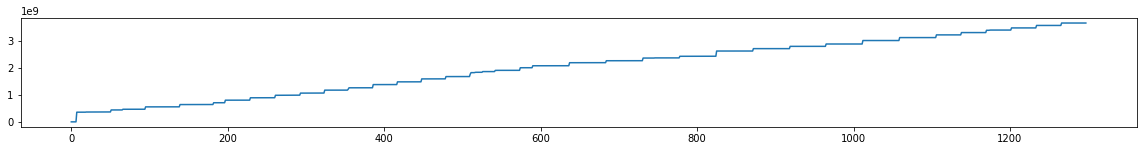

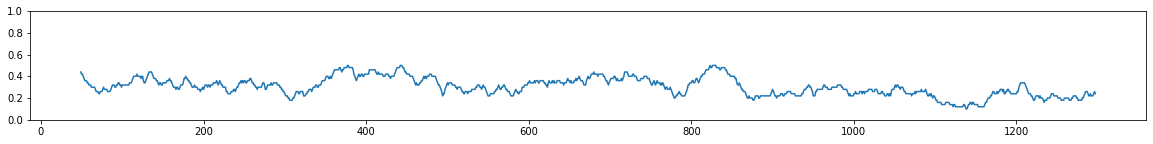

1684233400


content_id_nunique: 2842
question_num: 2794
lecture_num: 135


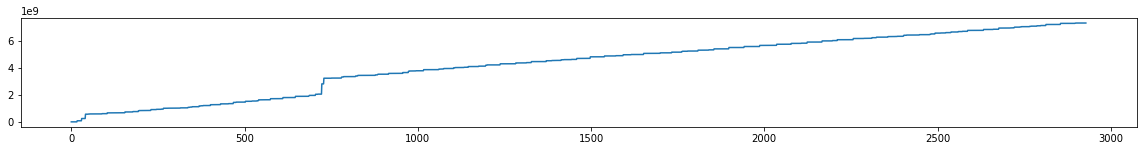

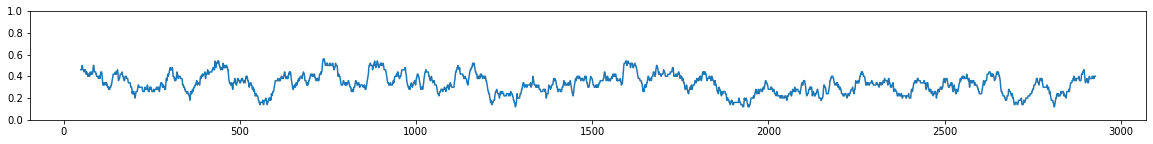

1397721000


content_id_nunique: 1394
question_num: 1469
lecture_num: 23


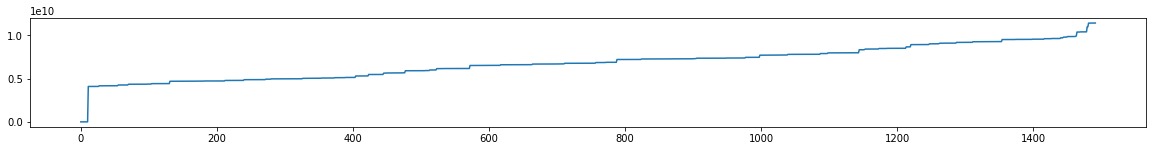

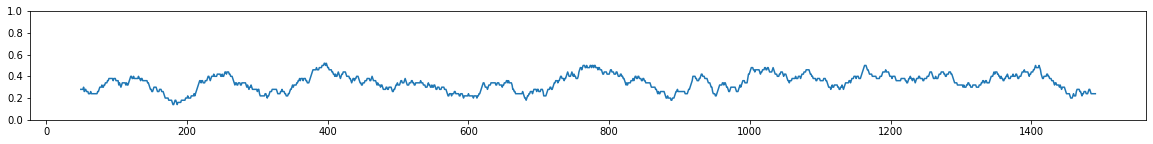

1425064800


content_id_nunique: 1325
question_num: 1619
lecture_num: 53


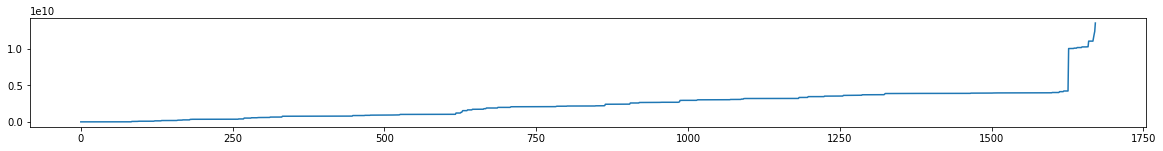

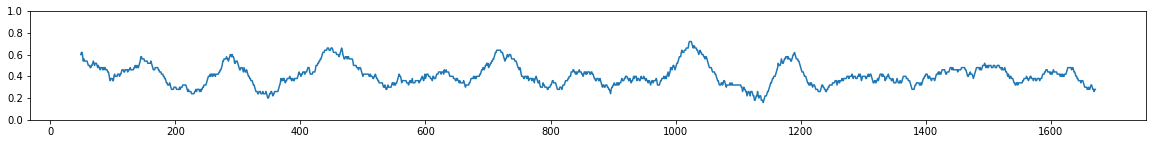

137501400


content_id_nunique: 880
question_num: 1019
lecture_num: 69


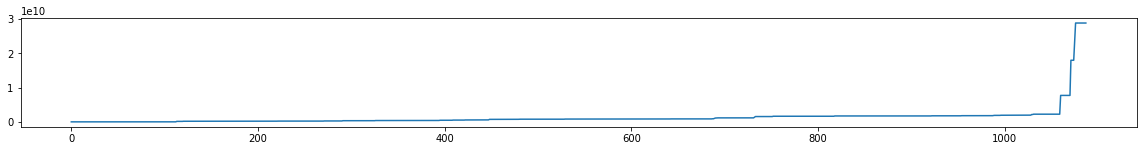

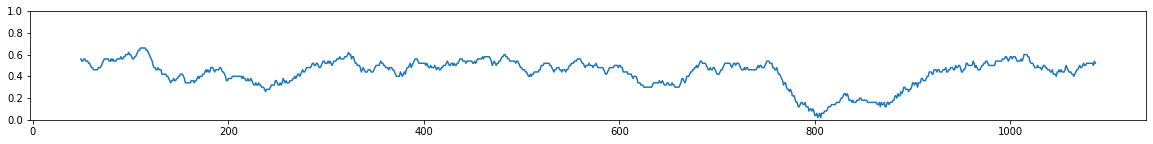

In [121]:
for user_id in user_id_ranking.index[:5]:
    print(f"{user_id}\n\n")
    w_df = df[df["user_id"] == user_id].reset_index(drop=True)
    print(f"content_id_nunique: {w_df['content_id'].nunique()}")
    print(f"question_num: {(w_df['answered_correctly'] != -1).sum()}")
    print(f"lecture_num: {(w_df['answered_correctly'] == -1).sum()}")
    w_df = w_df[w_df["answered_correctly"].notnull()]
    w_df["timestamp"].plot(figsize=(20, 2))
    plt.show()
    w_df["answered_correctly"].rolling(window=50).mean().plot(figsize=(20, 2), ylim=(0, 1))
    plt.show()

# EDA best5

1181468500


content_id_nunique: 1427
question_num: 1850
lecture_num: 16


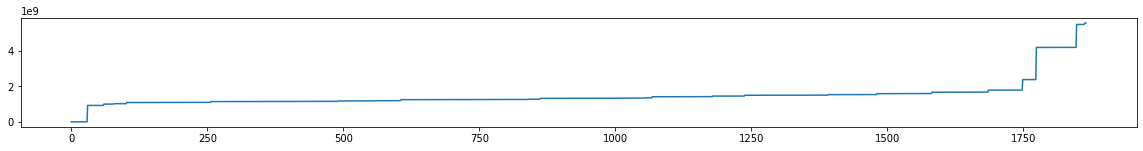

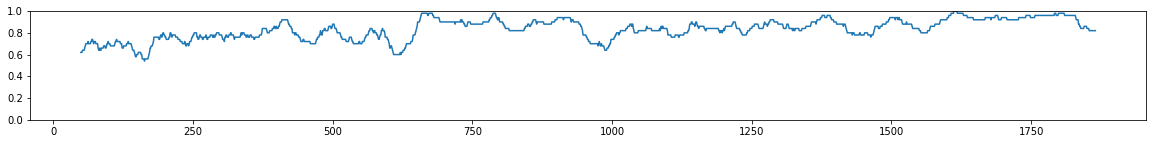

575418100


content_id_nunique: 992
question_num: 1542
lecture_num: 14


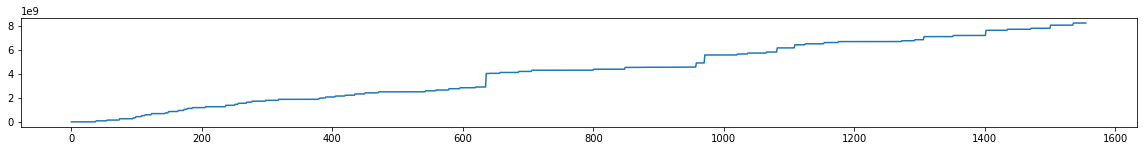

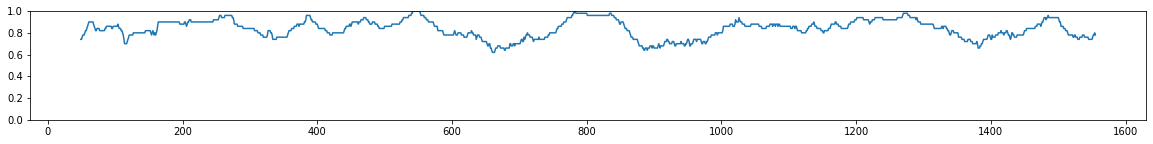

1793990200


content_id_nunique: 1661
question_num: 1765
lecture_num: 1


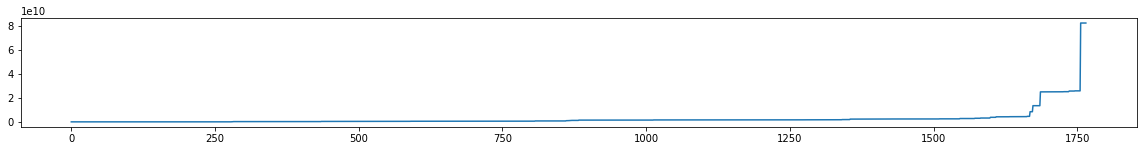

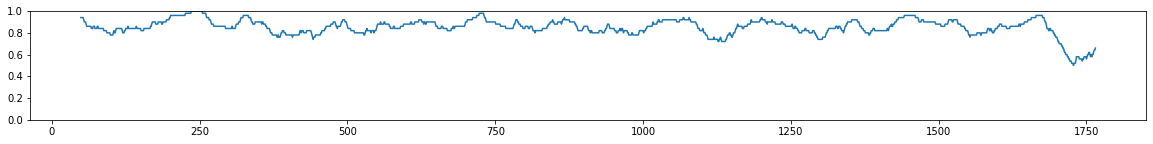

1355292600


content_id_nunique: 1026
question_num: 1067
lecture_num: 7


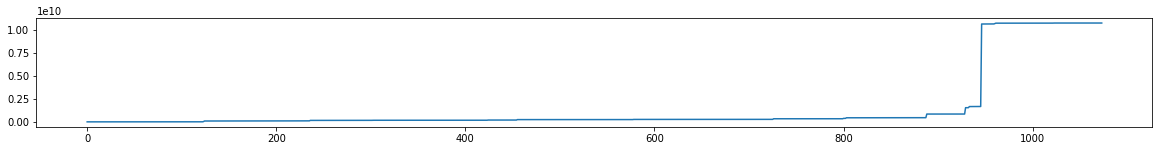

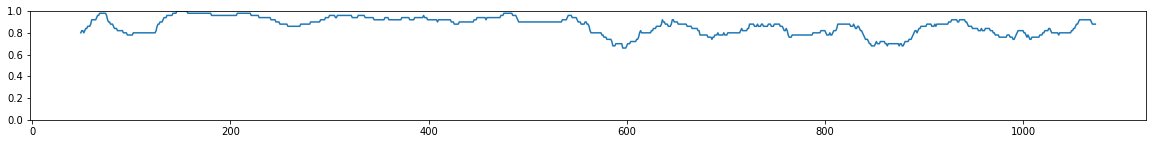

1912605200


content_id_nunique: 4909
question_num: 5303
lecture_num: 31


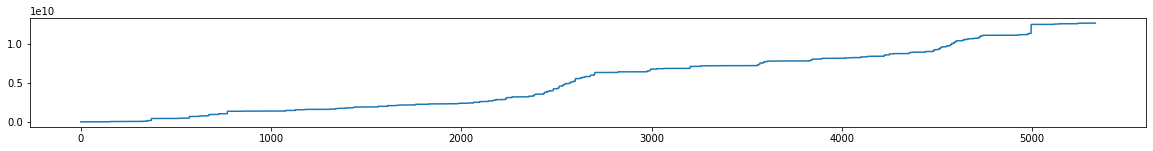

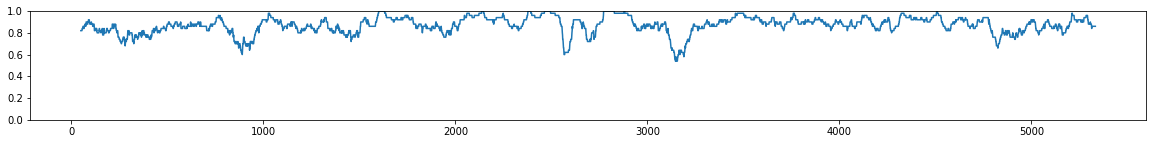

In [122]:
for user_id in user_id_ranking.index[-5:]:
    print(f"{user_id}\n\n")
    w_df = df[df["user_id"] == user_id].reset_index(drop=True)
    print(f"content_id_nunique: {w_df['content_id'].nunique()}")
    print(f"question_num: {(w_df['answered_correctly'] != -1).sum()}")
    print(f"lecture_num: {(w_df['answered_correctly'] == -1).sum()}")
    w_df = w_df[w_df["answered_correctly"].notnull()]
    w_df["timestamp"].plot(figsize=(20, 2))
    plt.show()
    w_df["answered_correctly"].rolling(window=50).mean().plot(figsize=(20, 2), ylim=(0, 1))
    plt.show()

In [127]:
ary = np.arange(len(user_id_ranking))
np.random.shuffle(ary)

In [131]:
(w_df['answered_correctly'] != -1).mean()

0.9806362378976486

1901793100


content_id_nunique: 1469
question_num: 1535
lecture_num: 28
targetencoding: 0.7270358306188925


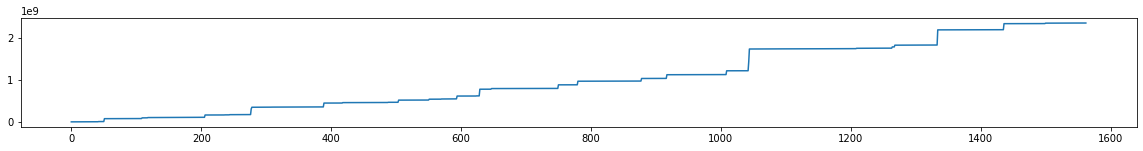

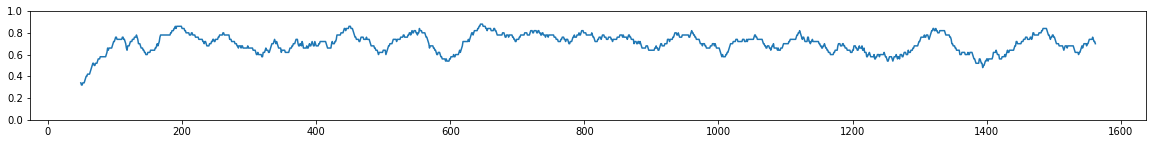

825156900


content_id_nunique: 3815
question_num: 4357
lecture_num: 30
targetencoding: 0.8154693596511361


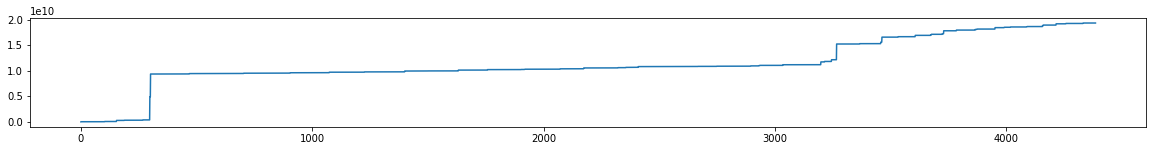

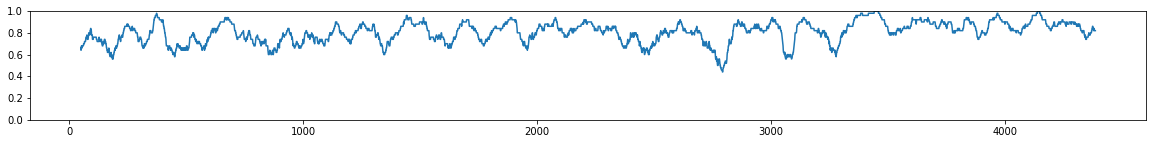

2002820600


content_id_nunique: 949
question_num: 984
lecture_num: 25
targetencoding: 0.5823170731707317


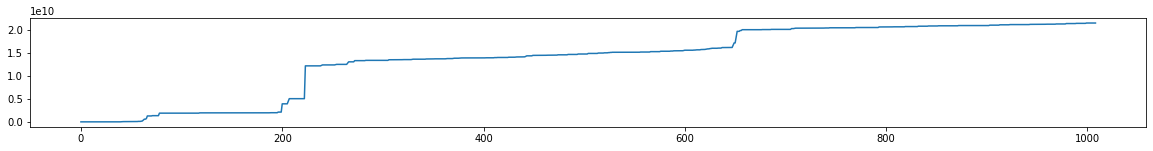

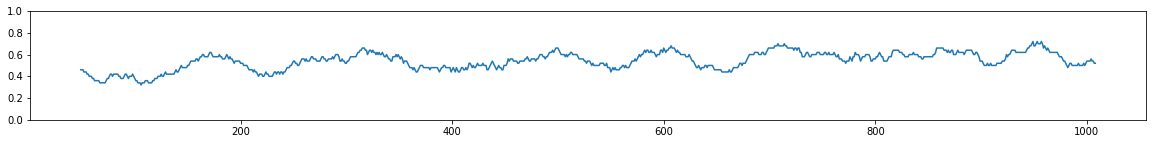

31587800


content_id_nunique: 2387
question_num: 2636
lecture_num: 89
targetencoding: 0.6684370257966616


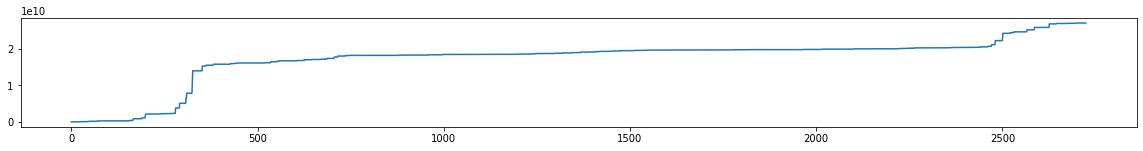

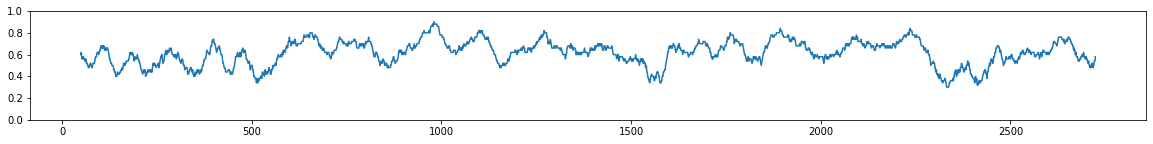

1864970300


content_id_nunique: 1309
question_num: 1369
lecture_num: 31
targetencoding: 0.6785975164353543


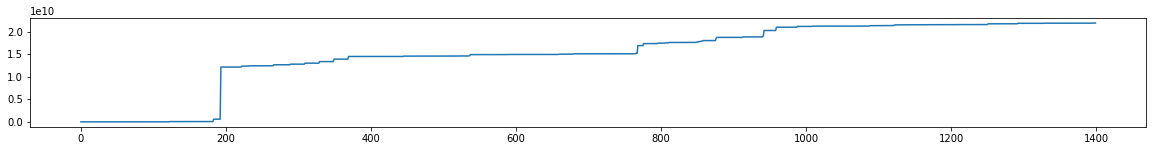

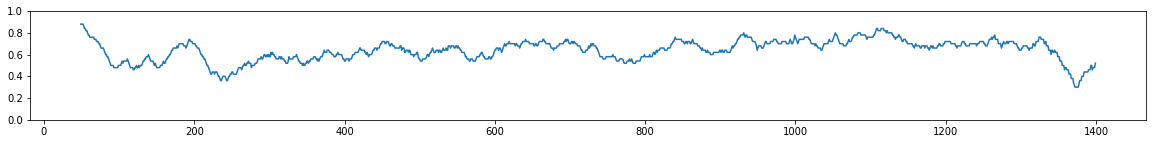

337856100


content_id_nunique: 2291
question_num: 2422
lecture_num: 41
targetencoding: 0.7630057803468208


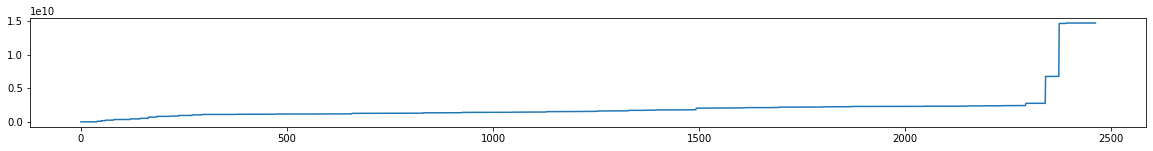

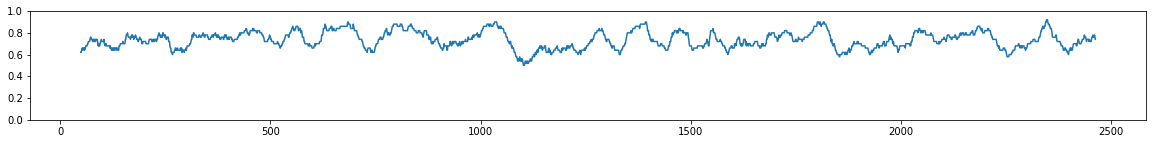

1067105800


content_id_nunique: 2152
question_num: 2440
lecture_num: 90
targetencoding: 0.6545081967213114


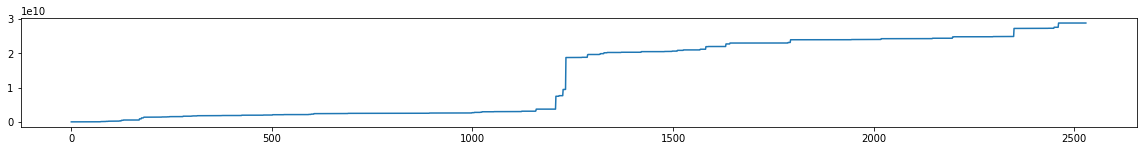

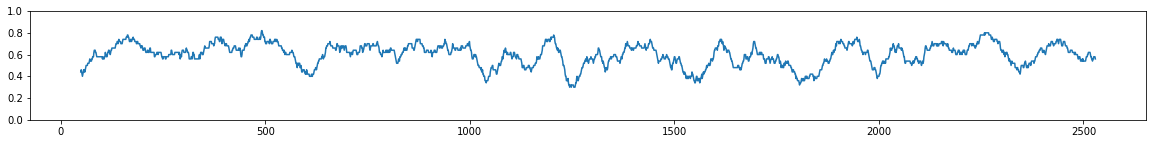

1641602700


content_id_nunique: 1039
question_num: 1257
lecture_num: 30
targetencoding: 0.6690533015115354


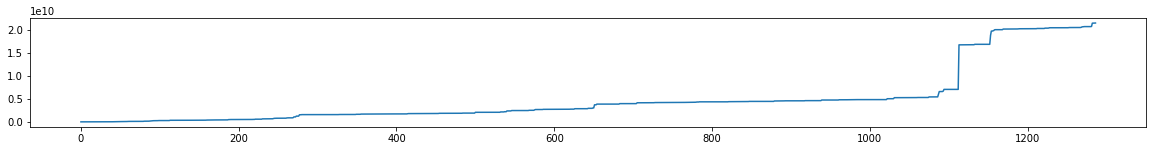

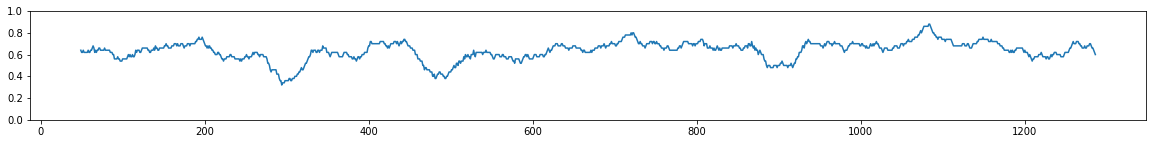

1532099700


content_id_nunique: 1193
question_num: 1253
lecture_num: 28
targetencoding: 0.7262569832402235


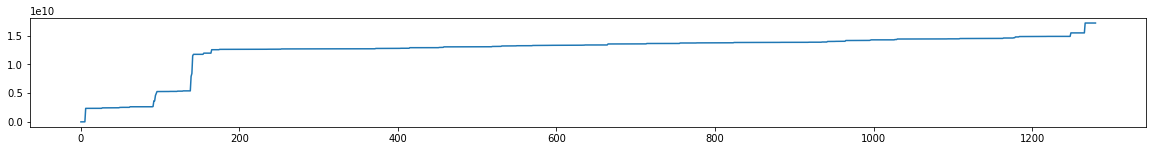

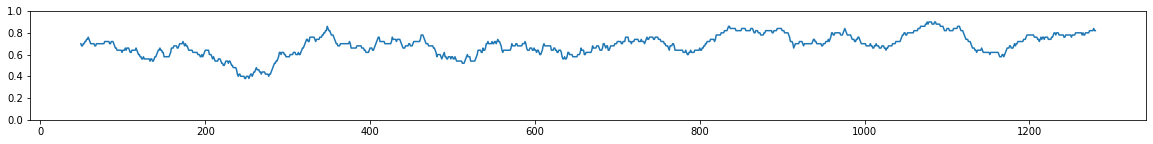

365650200


content_id_nunique: 1343
question_num: 1418
lecture_num: 28
targetencoding: 0.7179125528913963


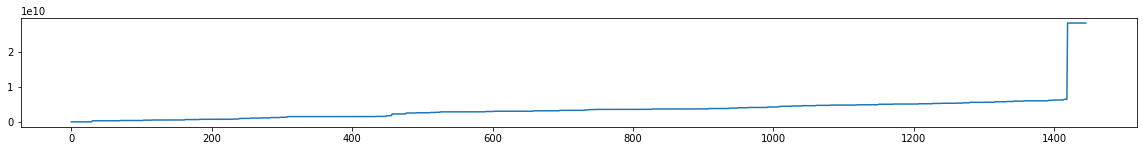

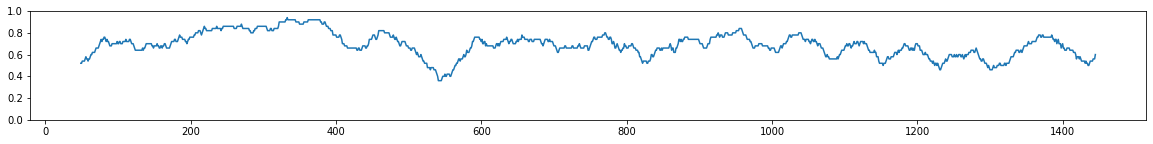

In [138]:
for user_id in user_id_ranking.index[ary[:10]]:
    print(f"{user_id}\n\n")
    w_df = df[df["user_id"] == user_id].reset_index(drop=True)
    print(f"content_id_nunique: {w_df['content_id'].nunique()}")
    print(f"question_num: {(w_df['answered_correctly'] != -1).sum()}")
    print(f"lecture_num: {(w_df['answered_correctly'] == -1).sum()}")
    print(f"targetencoding: {w_df[w_df['answered_correctly'] != -1]['answered_correctly'].mean()}")
    w_df = w_df[w_df["answered_correctly"].notnull()]
    w_df["timestamp"].plot(figsize=(20, 2))
    plt.show()
    w_df["answered_correctly"].rolling(window=50).mean().plot(figsize=(20, 2), ylim=(0, 1))
    plt.show()